/var/folders/n4/p2lmf2l94x3gfqhs72xx2zwr0000gn/T/ipykernel_49771/4173978337.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period='6mo', interval='1d')
[*********************100%***********************]  1 of 1 completed


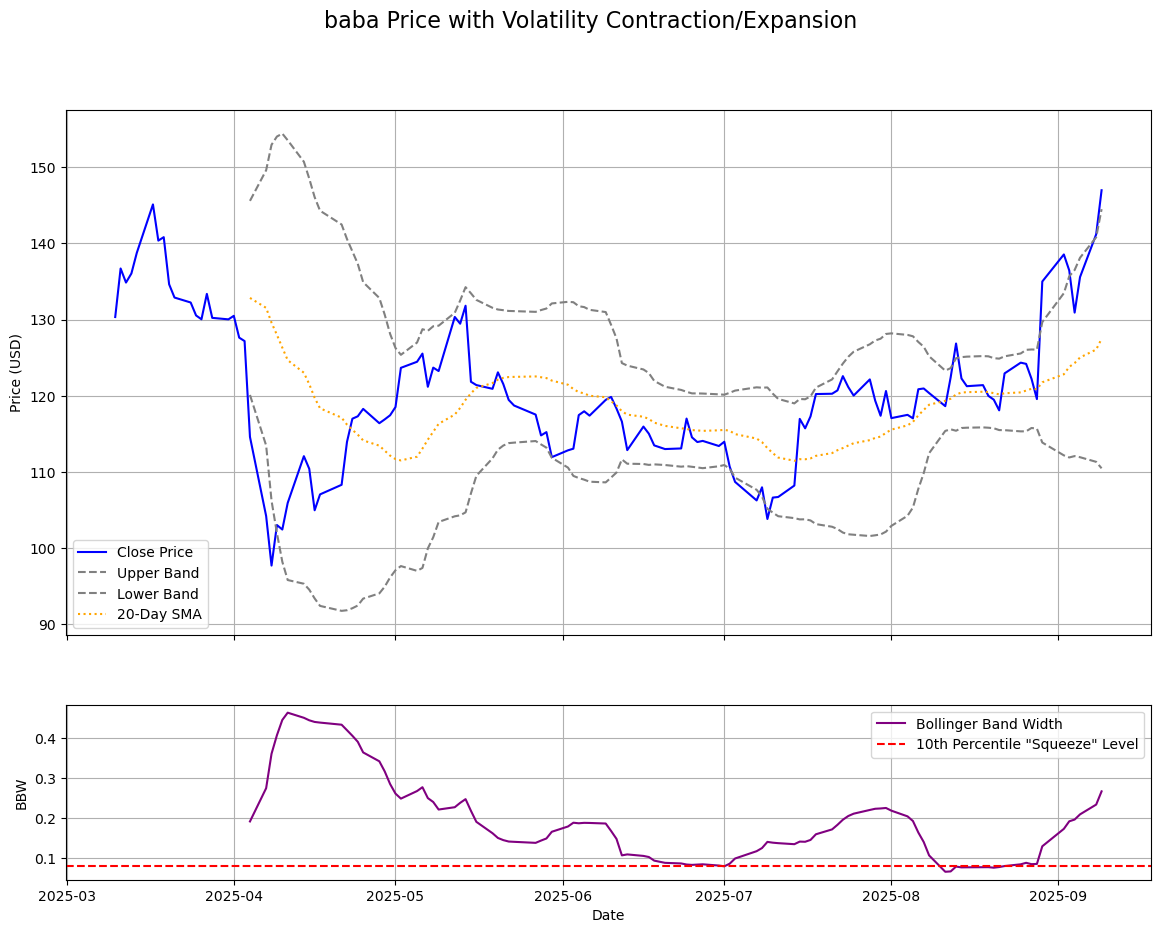

In [2]:
# Install yfinance if not already installed
# pip install yfinance

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Download data
ticker = 'baba'
data = yf.download(ticker, period='6mo', interval='1d')

# Calculate Bollinger Bands
window = 20
std_dev = 2
data['SMA'] = data['Close'].rolling(window=window).mean()
data['StdDev'] = data['Close'].rolling(window=window).std()
data['UpperBand'] = data['SMA'] + (data['StdDev'] * std_dev)
data['LowerBand'] = data['SMA'] - (data['StdDev'] * std_dev)

# Calculate Bollinger Band Width (BBW)
data['BBW'] = (data['UpperBand'] - data['LowerBand']) / data['SMA']

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
fig.suptitle(f'{ticker} Price with Volatility Contraction/Expansion', fontsize=16)

# Plot 1: Price and Bollinger Bands
ax1.plot(data['Close'], label='Close Price', color='blue')
ax1.plot(data['UpperBand'], label='Upper Band', color='gray', linestyle='--')
ax1.plot(data['LowerBand'], label='Lower Band', color='gray', linestyle='--')
ax1.plot(data['SMA'], label='20-Day SMA', color='orange', linestyle=':')
ax1.set_ylabel('Price (USD)')
ax1.legend()
ax1.grid(True)

# Plot 2: Bollinger Band Width
ax2.plot(data['BBW'], label='Bollinger Band Width', color='purple')
# Add a line for historical low levels to spot the squeeze
ax2.axhline(data['BBW'].quantile(0.10), color='red', linestyle='--', label='10th Percentile "Squeeze" Level')
ax2.set_ylabel('BBW')
ax2.set_xlabel('Date')
ax2.legend()
ax2.grid(True)

plt.show()